In [1]:
hs_endpoint = 'https://developer.nrel.gov/api/hsds'
hs_username = None
hs_password = None
hs_api_key = 'API_KEY'

In [2]:
!pip install h5pyd

  Using cached numpy-2.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
neuralprophet 0.9.0 requires numpy<2.0.0,>=1.25.0, but you have numpy 2.2.0 which is incompatible.
pandas-profiling 3.0.0 requires tangled-up-in-unicode==0.1.0, but you have tangled-up-in-unicode 0.2.0 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.2.0 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.0 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but 

In [3]:
!pip show h5pyd | grep "Location:"

Location: /opt/conda/miniconda3/lib/python3.11/site-packages


In [4]:
import sys
sys.path.append('opt/conda/miniconda3/lib/python3.11/site-packages')

In [5]:
!sudo find -name hsconfigure

./opt/conda/miniconda3/bin/hsconfigure


In [ ]:
!echo -e "https://developer.nrel.gov/api/hsds\n\n\nAPI_KEY" | ./opt/conda/miniconda3/bin/hsconfigure

In [7]:
import h5pyd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Open the desired year of nsrdb data
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/nsrdb/current/nsrdb_2022.h5", 'r')

In [9]:
list(f)  # list the datasets in the file

['air_temperature',
 'alpha',
 'aod',
 'asymmetry',
 'cld_opd_dcomp',
 'cld_press_acha',
 'cld_reff_dcomp',
 'clearsky_dhi',
 'clearsky_dni',
 'clearsky_ghi',
 'cloud_fill_flag',
 'cloud_type',
 'dew_point',
 'dhi',
 'dni',
 'fill_flag',
 'ghi',
 'meta',
 'ozone',
 'relative_humidity',
 'solar_zenith_angle',
 'ssa',
 'surface_albedo',
 'surface_pressure',
 'time_index',
 'total_precipitable_water',
 'wind_direction',
 'wind_speed']

In [10]:
datasets = list(f)  # list the datasets in the file
print(datasets)

['air_temperature', 'alpha', 'aod', 'asymmetry', 'cld_opd_dcomp', 'cld_press_acha', 'cld_reff_dcomp', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi', 'cloud_fill_flag', 'cloud_type', 'dew_point', 'dhi', 'dni', 'fill_flag', 'ghi', 'meta', 'ozone', 'relative_humidity', 'solar_zenith_angle', 'ssa', 'surface_albedo', 'surface_pressure', 'time_index', 'total_precipitable_water', 'wind_direction', 'wind_speed']


In [11]:
to_remove = ['meta', 'time_index']
datasets = [d for d in datasets if d not in to_remove]
print(datasets)

['air_temperature', 'alpha', 'aod', 'asymmetry', 'cld_opd_dcomp', 'cld_press_acha', 'cld_reff_dcomp', 'clearsky_dhi', 'clearsky_dni', 'clearsky_ghi', 'cloud_fill_flag', 'cloud_type', 'dew_point', 'dhi', 'dni', 'fill_flag', 'ghi', 'ozone', 'relative_humidity', 'solar_zenith_angle', 'ssa', 'surface_albedo', 'surface_pressure', 'total_precipitable_water', 'wind_direction', 'wind_speed']


In [12]:
# Locational information is stored in either 'meta' or 'coordinates'
meta = pd.DataFrame(f['meta'][...])
meta.head()

,latitude,longitude,elevation,timezone,country,state,county
0,-15.950000,-179.979996,0,12,b'nan',b'nan',b'nan'
1,-15.990000,-179.979996,0,12,b'nan',b'nan',b'nan'
2,-16.030001,-179.979996,0,12,b'nan',b'nan',b'nan'
3,-16.070000,-179.979996,0,12,b'nan',b'nan',b'nan'
4,-16.110001,-179.979996,0,12,b'nan',b'nan',b'nan'


In [13]:
# Extract coordinates (lat, lon)
# print(dict(f['meta']['latitude','longitude']))
coords = meta[['latitude', 'longitude', 'elevation']]
coords.head()

,latitude,longitude,elevation
0,-15.950000,-179.979996,0
1,-15.990000,-179.979996,0
2,-16.030001,-179.979996,0
3,-16.070000,-179.979996,0
4,-16.110001,-179.979996,0


In [14]:
# Getting location data for the state of New Jersey
nj_state = coords[
    (coords['latitude'] >= 38.93) &
    (coords['latitude'] <= 41.36) &
    (coords['longitude'] >= -75.56) &
    (coords['longitude'] <= -73.9)
]
nj_state

,latitude,longitude,elevation
1194517,41.330002,-75.540001,540
1194518,41.290001,-75.540001,545
1194519,41.250000,-75.540001,556
1194520,41.209999,-75.540001,513
1194521,41.169998,-75.540001,533
...,...,...,...
1247832,39.730000,-73.900002,0
1247833,39.689999,-73.900002,0
1247834,39.650002,-73.900002,0
1247835,39.610001,-73.900002,0


In [15]:
# Getting GHI and Air Temperature data for New Jersey from the original dataset
subset_indices = list(nj_state.index)
ghi_data = f['ghi']
air_temp_data = f['air_temperature']
ghi_nj = ghi_data[:, subset_indices]
air_temp_nj = air_temp_data[:, subset_indices]

In [16]:
# Extracting Average daily values of GHI and air temperature for every month 
# Creating Feature dataframe with spatial and temporal features

feature_df = nj_state.reset_index().drop('index', axis=1)
# intervals_per_day = 48
MONTHS = {
    "Jan":(0,31*48),
    "Feb":(31*48,59*48),
    "Mar":(59*48,90*48),
    "Apr":(90*48,121*48),
    "May":(121*48,151*48),
    "June":(151*48,181*48),
    "July":(181*48,212*48),
    "Aug":(212*48,243*48),
    "Sep":(243*48,273*48),
    "Oct":(273*48,304*48),
    "Nov":(304*48,334*48),
    "Dec":(334*48,365*48)   
}

for month, (start, end) in MONTHS.items():
    feature_df[f'ghi_{month}'] = np.mean(ghi_nj[start:end, :], axis=0)
    feature_df[f'air_temp_{month}'] = np.mean(air_temp_nj[start:end, :], axis=0)

In [18]:
# Clustering and Silhouette Score analysis to find optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(6,21):
    kmeans = KMeans(init = "k-means++", n_clusters = k, random_state=7, n_init="auto", max_iter=500)
    kmeans.fit(feature_df)
    score = silhouette_score(feature_df, kmeans.labels_)
    silhouette_coefficients.append(score)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f8691f9c900>
Traceback (most recent call last):
  File "/opt/conda/miniconda3/lib/python3.11/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/miniconda3/lib/python3.11/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/opt/conda/miniconda3/lib/python3.11/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/miniconda3/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


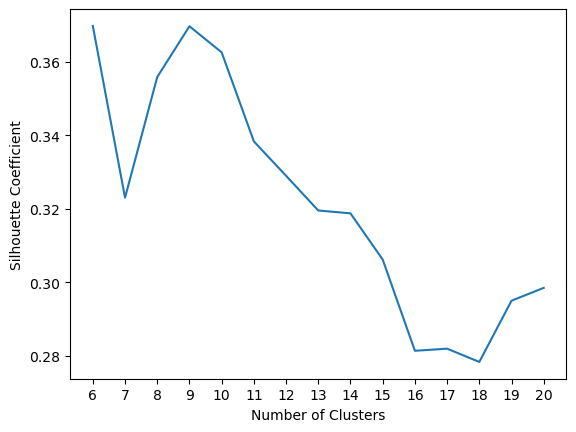

In [19]:
# Plotting the silhouette scores
import matplotlib.pyplot as plt
plt.plot(list(range(6,21)), silhouette_coefficients)
plt.xticks(list(range(6,21)))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [20]:
# Clustering with chosen n_clusters = 9
kmeans = KMeans(init = "k-means++", n_clusters = 9, random_state=7, n_init="auto")
kmeans.fit(feature_df)

KMeans(n_clusters=9, n_init='auto', random_state=7)

In [21]:
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [22]:
# Dataframe with PV Cell locations and their assigned cluster
clustered_locs = nj_state.assign(Cluster = kmeans.labels_)
clustered_locs

,latitude,longitude,elevation,Cluster
1194517,41.330002,-75.540001,540,0
1194518,41.290001,-75.540001,545,0
1194519,41.250000,-75.540001,556,0
1194520,41.209999,-75.540001,513,0
1194521,41.169998,-75.540001,533,0
...,...,...,...,...
1247832,39.730000,-73.900002,0,3
1247833,39.689999,-73.900002,0,3
1247834,39.650002,-73.900002,0,3
1247835,39.610001,-73.900002,0,3


In [23]:
# Visualizing the clustered locations on a map

import folium
from folium.plugins import GroupedLayerControl
import gcsfs

# Sampling 200 points from 2442 for easier visualization
cluster_samp = clustered_locs.sample(200)

# Initializing map location for New Jersey
nj_map = folium.Map(location=[40.730000, -74.000000], zoom_start=11)

# Assigning Cluster colors
colors = ['red', 'lightgreen', 'lightblue', 'beige', 'orange', 'darkblue', 'pink', 'darkgreen', 'gray']

# Create feature groups for each cluster
cluster_groups = {f'Cluster {i+1}': folium.FeatureGroup(name=f'Cluster {i+1}') for i in range(9)}

# Add the points to the map
for i, row in cluster_samp.iterrows():
    cluster_num = int(row['Cluster'])
    marker = folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Elevation: {row['elevation']} \nLatitude: {row['latitude']} \nLongitude: {row['longitude']}",
        icon=folium.Icon(color=colors[cluster_num - 1])
    )
    cluster_groups[f'Cluster {cluster_num+1}'].add_child(marker)

# Add all feature groups to the map
for group in cluster_groups.values():
    nj_map.add_child(group)

# Add a legend
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; right: 50px; width: 150px; height: 90px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding: 10px;
            overflow-y: auto;
            ">
            <p style="margin-bottom: 5px"><strong>Cluster Legend</strong></p>
'''

for i, color in enumerate(colors, 1):
    legend_html += f'<p style="margin: 2px"><span style="background-color: {color};padding: 0 5px;border-radius: 50%;margin-right: 5px;">&nbsp;</span>Cluster {i}</p>'

legend_html += '</div>'
nj_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map
map_html = nj_map.get_root().render()
fs = gcsfs.GCSFileSystem()

with fs.open("gs://forecast_results/Clustering_viz.html", 'w') as file:
    file.write(map_html)

# Display the map
nj_map


In [26]:
# Get cluster with cluster label = 3
cluster3 = clustered_locs[clustered_locs['Cluster']==3]
cluster3

,latitude,longitude,elevation,Cluster
1194557,39.730000,-75.540001,10,3
1194558,39.689999,-75.540001,7,3
1194559,39.650002,-75.540001,1,3
1194560,39.610001,-75.540001,5,3
1194561,39.570000,-75.540001,1,3
...,...,...,...,...
1247832,39.730000,-73.900002,0,3
1247833,39.689999,-73.900002,0,3
1247834,39.650002,-73.900002,0,3
1247835,39.610001,-73.900002,0,3


In [27]:
# Get cluster with cluster label = 6
cluster6 = clustered_locs[clustered_locs['Cluster']==6]
cluster6

,latitude,longitude,elevation,Cluster
1194573,39.090000,-75.540001,18,6
1195911,39.770000,-75.500000,44,6
1197245,40.090000,-75.459999,55,6
1197252,39.810001,-75.459999,32,6
1198584,40.090000,-75.419998,49,6
...,...,...,...,...
1241412,40.290001,-74.099998,29,6
1241413,40.250000,-74.099998,41,6
1241414,40.209999,-74.099998,32,6
1241415,40.169998,-74.099998,34,6


In [28]:
# Time indices for year 2022
time_index = pd.to_datetime(f['time_index'][...].astype(str)).tz_convert('US/Eastern')
time_index

DatetimeIndex(['2021-12-31 19:00:00-05:00', '2021-12-31 19:30:00-05:00',
               '2021-12-31 20:00:00-05:00', '2021-12-31 20:30:00-05:00',
               '2021-12-31 21:00:00-05:00', '2021-12-31 21:30:00-05:00',
               '2021-12-31 22:00:00-05:00', '2021-12-31 22:30:00-05:00',
               '2021-12-31 23:00:00-05:00', '2021-12-31 23:30:00-05:00',
               ...
               '2022-12-31 14:00:00-05:00', '2022-12-31 14:30:00-05:00',
               '2022-12-31 15:00:00-05:00', '2022-12-31 15:30:00-05:00',
               '2022-12-31 16:00:00-05:00', '2022-12-31 16:30:00-05:00',
               '2022-12-31 17:00:00-05:00', '2022-12-31 17:30:00-05:00',
               '2022-12-31 18:00:00-05:00', '2022-12-31 18:30:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', length=17520, freq=None)

In [56]:
# Function to get the average GHI and weather time series features for all locations for a chosen cluster and year
def get_cluster_data(subset_index, fn):
    data = pd.DataFrame() 
    data['time_index'] = pd.to_datetime(fn['time_index'][...].astype(str)).tz_convert('US/Eastern')

    for d in datasets:
        dset = fn[d]
        tseries = np.mean(dset[:, subset_index], 1)
        data[d] = tseries
    return data

In [30]:
# List of location indices for clusters 3 and 6
cluster3_idx = list(cluster3.index)
cluster6_idx = list(cluster6.index)

# Get averaged cluster data for year 2022
cluster3_data_2022 = get_cluster_data(cluster3_idx, f)
cluster6_data_2022 = get_cluster_data(cluster6_idx, f)

In [35]:
# Cluster 6 data for 2022-01-13 7:30 AM 
cluster6_data_2022.iloc[601,:]

time_index                  2022-01-13 07:30:00-05:00
air_temperature                              4.858268
alpha                                      136.462992
aod                                         43.247244
asymmetry                                   60.976378
cld_opd_dcomp                              114.267717
cld_press_acha                             111.667717
cld_reff_dcomp                             528.932283
clearsky_dhi                                12.647244
clearsky_dni                               150.352756
clearsky_ghi                                16.270866
cloud_fill_flag                              2.770079
cloud_type                                   3.091339
dew_point                                  -13.047244
dhi                                         10.828346
dni                                         68.029921
fill_flag                                   40.034646
ghi                                         12.417323
ozone                       

In [55]:
# Function to get the GHI and weather time series features for a point in a chosen cluster and year
def get_point_data(pt_index, fn):
    data = pd.DataFrame() 
    data['time_index'] = pd.to_datetime(fn['time_index'][...].astype(str)).tz_convert('US/Eastern')

    for d in datasets:
        dset = fn[d]
        tseries = dset[:, pt_index]
        data[d] = tseries
    return data

In [38]:
# Get data for 2 points each from cluster 3 and cluster 6 for year 2022
cluster3_point1_2022 = get_point_data(1194557, f)
cluster3_point2_2022 = get_point_data(1247832, f)
cluster6_point1_2022 = get_point_data(1197245, f)
cluster6_point2_2022 = get_point_data(1241414, f)

In [40]:
# Load data from NRSDB database for 2023
f2 = h5pyd.File("/nrel/nsrdb/GOES/aggregated/v4.0.0/nsrdb_2023.h5", 'r')

In [58]:
# Get the average cluster data for cluster 3 and cluster 6 for year 2023
cluster3_data_2023 = get_cluster_data(cluster3_idx, f2)
cluster6_data_2023 = get_cluster_data(cluster6_idx, f2)

# Get data for 2 points each from cluster 3 and cluster 6 for year 2023
cluster3_point1_2023 = get_point_data(1194557, f2)
cluster3_point2_2023 = get_point_data(1247832, f2)
cluster6_point1_2023 = get_point_data(1197245, f2)
cluster6_point2_2023 = get_point_data(1241414, f2)

In [65]:
# Join all 2022 and 2023 data for clusters 3 and 6 

cluster3_point1 = pd.concat([cluster3_point1_2022, cluster3_point1_2023], axis=0).reset_index().drop('index', axis=1)
cluster3_point2 = pd.concat([cluster3_point2_2022, cluster3_point2_2023], axis=0).reset_index().drop('index', axis=1)
cluster6_point1 = pd.concat([cluster6_point1_2022, cluster6_point1_2023], axis=0).reset_index().drop('index', axis=1)
cluster6_point2 = pd.concat([cluster6_point2_2022, cluster6_point2_2023], axis=0).reset_index().drop('index', axis=1)

cluster3_data = pd.concat([cluster3_data_2022, cluster3_data_2023], axis=0).reset_index().drop('index', axis=1)
cluster6_data = pd.concat([cluster6_data_2022, cluster6_data_2023], axis=0).reset_index().drop('index', axis=1)

In [63]:
cluster3_point1

,time_index,air_temperature,alpha,aod,asymmetry,cld_opd_dcomp,cld_press_acha,cld_reff_dcomp,clearsky_dhi,clearsky_dni,...,ghi,ozone,relative_humidity,solar_zenith_angle,ssa,surface_albedo,surface_pressure,total_precipitable_water,wind_direction,wind_speed
0,2021-12-31 19:00:00-05:00,88,122,91,60,0,0,0,0,0,...,0,301,9694,11463,96,13,1013,24,159,10
1,2021-12-31 19:30:00-05:00,87,122,91,60,0,0,0,0,0,...,0,300,9760,12033,96,13,1013,24,165,11
2,2021-12-31 20:00:00-05:00,87,121,95,60,0,0,0,0,0,...,0,299,9787,12609,96,13,1013,24,170,11
3,2021-12-31 20:30:00-05:00,86,121,95,60,0,0,0,0,0,...,0,297,9853,13185,96,13,1013,25,180,13
4,2021-12-31 21:00:00-05:00,86,118,104,60,0,0,0,0,0,...,0,296,9911,13758,96,13,1012,25,190,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2023-12-31 16:30:00-05:00,46,142,42,61,1044,453,1756,17,214,...,9,342,8406,8769,91,14,1015,11,230,10
35036,2023-12-31 17:00:00-05:00,40,145,41,61,228,0,377,0,0,...,0,343,7739,9296,91,14,1015,11,221,11
35037,2023-12-31 17:30:00-05:00,34,145,41,61,0,0,0,0,0,...,0,344,8073,9816,92,14,1015,11,217,12
35038,2023-12-31 18:00:00-05:00,28,145,44,61,0,0,0,0,0,...,0,345,8108,10354,92,14,1015,11,213,12


In [ ]:
# Save the data to GCP bucket as csv file

cluster3_data.to_csv("gs://raw_solar_data/Cluster_3_Avg_Data.csv")
cluster6_data.to_csv("gs://raw_solar_data/Cluster_6_Avg_Data.csv")
cluster3_point1.to_csv("gs://raw_solar_data/Cluster_3_Point_1_Data.csv")
cluster3_point2.to_csv("gs://raw_solar_data/Cluster_3_Point_2_Data.csv")
cluster6_point1.to_csv("gs://raw_solar_data/Cluster_6_Point_1_Data.csv")
cluster6_point2.to_csv("gs://raw_solar_data/Cluster_6_Point_2_Data.csv")